<a href="https://colab.research.google.com/github/rrizkiramadhan08/RizkiRamadhanTask/blob/main/Week03/Regression_model_Decision_Tree__k_NN_MaterialStrength_Rizki_Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Step 1: Load Dataset
df = pd.read_csv('/content/drive/MyDrive/DATA SET/MaterialStrength.csv')

# Step 2: Preprocess the dataset
# Gunakan Label Encoding untuk kolom kategorikal (misalnya kolom 'x14' dan 'x15')
label_encoder = LabelEncoder()

df['x14'] = label_encoder.fit_transform(df['x14'].str.lower())  # Mengubah menjadi lowercase untuk konsistensi
df['x15'] = label_encoder.fit_transform(df['x15'].str.lower())  # Mengubah menjadi lowercase untuk konsistensi

# Misalnya kolom 'target_feature' adalah target (y) dan kolom lainnya adalah fitur (X)
X = df.drop('target_feature', axis=1).values  # Semua kolom kecuali kolom target
y = df['target_feature'].values  # Kolom target (misalnya kekuatan material)

In [3]:
# Step 3: Split data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Decision Tree Regressor ###

In [4]:
# Step 4: Initialize and train Decision Tree model
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Step 5: Predict using Decision Tree
y_pred_tree = tree_regressor.predict(X_test)

In [5]:
# Step 6: Evaluate Decision Tree model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree MSE: {mse_tree:.4f}")
print(f"Decision Tree R^2: {r2_tree:.4f}")

Decision Tree MSE: 19.6658
Decision Tree R^2: 0.9237


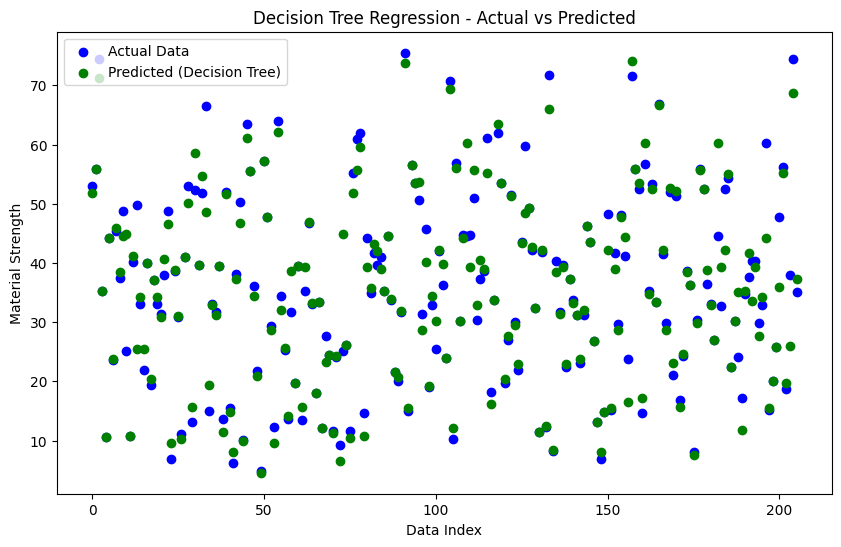

In [6]:
### Visualisasi ###
# Step 10: Visualisasi hasil prediksi Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Data')
plt.scatter(range(len(y_pred_tree)), y_pred_tree, color='green', label='Predicted (Decision Tree)')
plt.title('Decision Tree Regression - Actual vs Predicted')
plt.xlabel('Data Index')
plt.ylabel('Material Strength')
plt.legend()
plt.show()

### K-NN Regressor ###

In [7]:
# Step 7: Initialize and train K-NN model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Menggunakan 5 tetangga
knn_regressor.fit(X_train, y_train)

# Step 8: Predict using K-NN
y_pred_knn = knn_regressor.predict(X_test)

In [8]:
# Step 9: Evaluate K-NN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"K-NN MSE: {mse_knn:.4f}")
print(f"K-NN R^2: {r2_knn:.4f}")

K-NN MSE: 72.5404
K-NN R^2: 0.7185


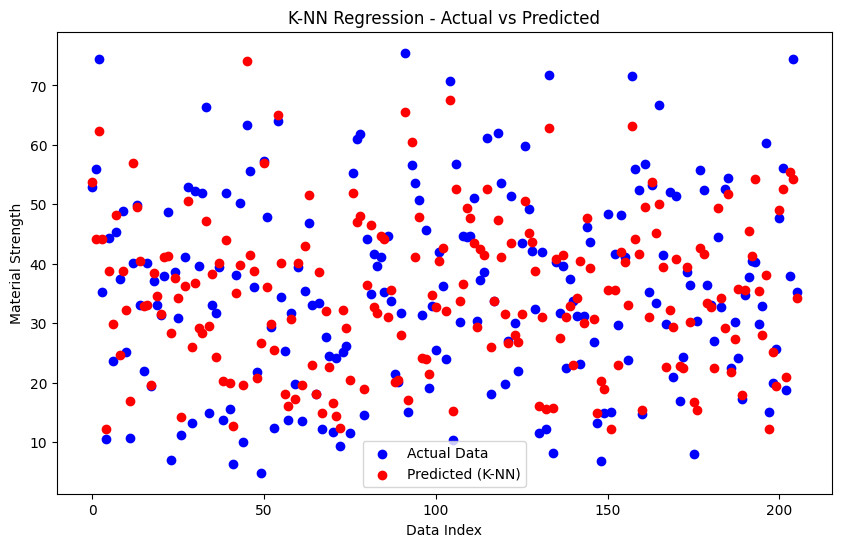

In [9]:
# Step 11: Visualisasi hasil prediksi K-NN
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Data')
plt.scatter(range(len(y_pred_knn)), y_pred_knn, color='red', label='Predicted (K-NN)')
plt.title('K-NN Regression - Actual vs Predicted')
plt.xlabel('Data Index')
plt.ylabel('Material Strength')
plt.legend()
plt.show()